In [1]:
!pip install opencv-python numpy


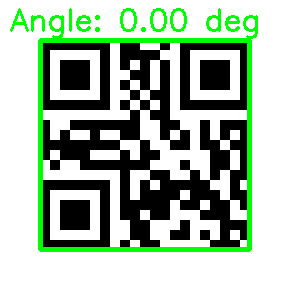

In [4]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

img = cv2.imread("sample_qr.jpg.png")  # ← CHANGE THIS TO YOUR FILE NAME

qr = cv2.QRCodeDetector()
data, points, _ = qr.detectAndDecode(img)

if points is not None:
    pts = points[0].astype(int)

    for i in range(4):
        cv2.line(img, tuple(pts[i]), tuple(pts[(i+1)%4]), (0,255,0), 3)

    (x1, y1) = pts[0]
    (x2, y2) = pts[1]
    angle = np.degrees(np.arctan2(y2 - y1, x2 - x1))

    cv2.putText(img, f"Angle: {angle:.2f} deg", (10,30),
                cv2.FONT_HERSHEY_SIMPLEX, 1.0, (0,255,0), 2)

else:
    print("QR not detected")

cv2_imshow(img)

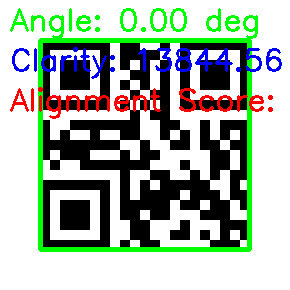

In [6]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# Load image
img = cv2.imread("sample_qr.jpg.png") # Corrected filename

qr = cv2.QRCodeDetector()
data, points, _ = qr.detectAndDecode(img)

if points is not None:
    pts = points[0].astype(int) # Added .astype(int) for cv2.line compatibility

    # Draw bounding box
    for i in range(4):
        pt1 = tuple(pts[i])
        pt2 = tuple(pts[(i+1)%4])
        cv2.line(img, pt1, pt2, (0,255,0), 3)

    # Calculate angle
    (x1, y1) = pts[0]
    (x2, y2) = pts[1]

    angle = np.degrees(np.arctan2(y2 - y1, x2 - x1))
    alignment_score = max(0, 100 - abs(angle))

    # Clarity
    x_min, y_min = pts[:,0].min(), pts[:,1].min()
    x_max, y_max = pts[:,0].max(), pts[:,1].max()

    crop = img[int(y_min):int(y_max), int(x_min):int(x_max)]
    gray = cv2.cvtColor(crop, cv2.COLOR_BGR2GRAY)
    clarity = cv2.Laplacian(gray, cv2.CV_64F).var()

    # Display results on image
    cv2.putText(img, f"Angle: {angle:.2f} deg", (10,30),
                cv2.FONT_HERSHEY_SIMPLEX, 1.0, (0,255,0), 2)

    cv2.putText(img, f"Clarity: {clarity:.2f}", (10,70),
                cv2.FONT_HERSHEY_SIMPLEX, 1.0, (255,0,0), 2)

    cv2.putText(img, f"Alignment Score: {alignment_score:.2f}", (10,110),
                cv2.FONT_HERSHEY_SIMPLEX, 1.0, (0,0,255), 2)

else:
    print("QR Not Detected")

cv2_imshow(img)